In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = [10,20,22,11,32]
series = pd.Series(data)
series

0    10
1    20
2    22
3    11
4    32
dtype: int64

In [15]:
df = pd.read_csv('data.csv')
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [16]:
filtered_df = df[df['Pulse'] > 120]
filtered_df

,Duration,Pulse,Maxpulse,Calories
22,60,130,101,300.0
51,80,123,146,643.1
54,30,136,175,238.0
55,60,121,146,450.7
58,20,153,172,226.4
59,45,123,152,321.0
80,30,159,182,319.2
81,45,149,169,344.0
85,30,151,170,300.0
88,45,129,103,242.0


In [17]:
filtered_df.sort_values(by='Calories')

,Duration,Pulse,Maxpulse,Calories
112,15,124,139,124.2
94,20,150,171,127.4
135,20,136,156,189.0
139,20,141,162,222.4
58,20,153,172,226.4
95,20,151,168,229.4
54,30,136,175,238.0
88,45,129,103,242.0
97,25,152,168,244.2
153,30,150,167,275.8


In [18]:
grouped_mean = df.groupby('Duration')['Calories'].mean()
grouped_mean.head()

Duration
15     87.350000
20    151.600000
25    244.200000
30    192.125000
45    273.236364
Name: Calories, dtype: float64

KeyError: 'duration'

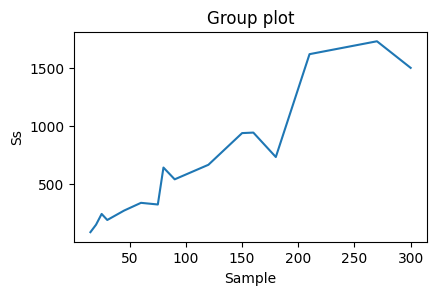

In [19]:
# plt.figure(figsize=(10,6))
# plt.subplot(2,2,1)
# grouped_mean.plot(kind='line', title='Group plot')
# plt.xlabel("Sample")
# plt.ylabel("Ss")

# grouped_count = df.groupby('duration').size()
# group_count_head = grouped_count.head()

# plt.subplot(2,2,2)
# group_count_head.plot(kind = 'pie', )
# plt.tight_layout()


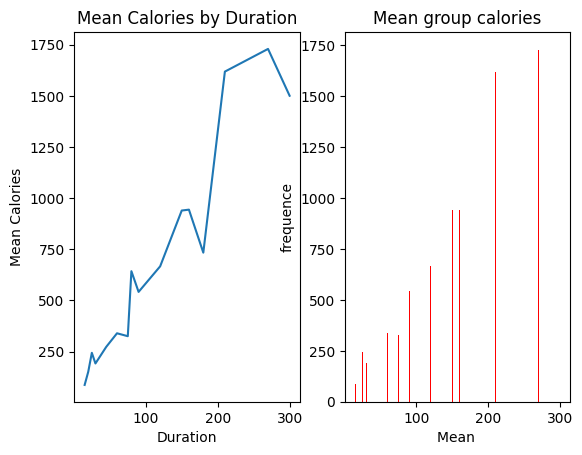

In [20]:
plt.subplot(1, 2, 1)
grouped_mean.plot(kind='line', title='Mean Calories by Duration')
plt.xlabel('Duration')
plt.ylabel('Mean Calories')

plt.subplot(1,2,2)
plt.bar(grouped_mean.index, grouped_mean.values, color='red')
plt.xlabel('Mean ')
plt.ylabel('frequence')
plt.title('Mean group calories')
plt.show()


In [ ]:
healthcare = pd.read_csv('healthcare_dataset.csv')

subset1 = healthcare.iloc[10:]
subset = healthcare.iloc[10:20]

concatenated_df = pd.concat([subset1,subset])

concatenated_df.sample(n=5).iloc[:,:5]

,Name,Age,Gender,Blood Type,Medical Condition
31377,sTEPHanIE ruiz,39,Male,O-,Hypertension
40338,jAMIE smIth,57,Male,O-,Obesity
45864,ricaRdO SmITh,62,Female,O+,Asthma
17498,ANDrEW PArkEr,23,Female,B+,Cancer
25314,ChErYl MALdONado,54,Male,O+,Obesity


In [ ]:
df1 = healthcare[['Name','Age','Gender','Blood Type']]

df2 = healthcare[['Name','Hospital','Medical Condition']]

merged_df = pd.merge(df1,df2,on='Name')

merged_df

,Name,Age,Gender,Blood Type,Hospital,Medical Condition
0,Bobby JacksOn,30,Male,B-,Sons and Miller,Cancer
1,LesLie TErRy,62,Male,A+,Kim Inc,Obesity
2,DaNnY sMitH,76,Female,A-,Cook PLC,Obesity
3,andrEw waTtS,28,Female,O+,"Hernandez Rogers and Vang,",Diabetes
4,adrIENNE bEll,43,Female,AB+,White-White,Cancer
...,...,...,...,...,...,...
66513,HEATher WaNG,38,Female,B+,"and Mahoney Johnson Vasquez,",Hypertension
66514,JENniFER JOneS,43,Male,O-,"Jackson Todd and Castro,",Arthritis
66515,JENniFER JOneS,43,Male,O-,"Jackson Todd and Castro,",Arthritis
66516,jAMES GARCiA,53,Female,O+,Henry Sons and,Arthritis


In [ ]:
joined_df = df1.join(df2.set_index('Name'), on='Name', lsuffix='_left', rsuffix= '_right')

joined_df.sample(n=5).iloc[:,:5]

,Name,Age,Gender,Blood Type,Hospital
25859,DErrIck cOntReraS,58,Male,AB+,"Wright Morris, and Graves"
51616,cHrIStoPhEr CORtez,40,Male,B+,Barron-Jarvis
46310,josEph espInozA,64,Male,O-,Smith LLC
48706,MigUeL RodgerS,40,Male,B+,Group Bates
9455,aSHlee HARRIs,71,Male,AB+,"and Farmer, Harvey Alvarez"


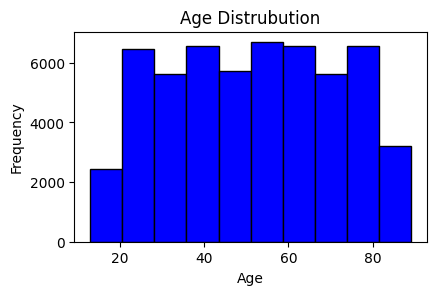

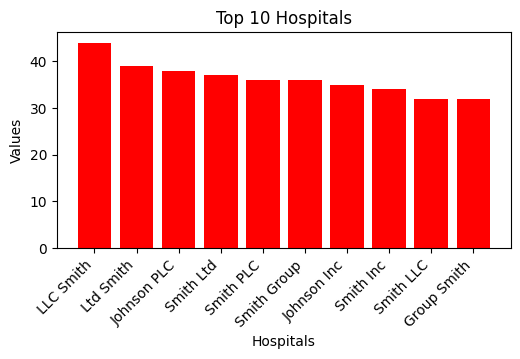

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.hist(healthcare['Age'],bins=10,color='blue',edgecolor='black')
plt.title("Age Distrubution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(2,2,2)
plt.bar(healthcare['Hospital'].value_counts().head(10).index,healthcare['Hospital'].value_counts().head(10).values,color='red')
plt.title('Top 10 Hospitals')
plt.xlabel('Hospitals')
plt.ylabel('Values')
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()